[View in Colaboratory](https://colab.research.google.com/github/Masum06/gender_newspaper/blob/master/word2vec_similarity_statistics.ipynb)

In [1]:
!pip install lxml

    100% |████████████████████████████████| 5.9MB 4.0MB/s 


In [2]:
!pip install gensim

    100% |████████████████████████████████| 23.5MB 1.7MB/s 
    100% |████████████████████████████████| 1.4MB 14.6MB/s 
    100% |████████████████████████████████| 133kB 21.2MB/s 
    100% |████████████████████████████████| 61kB 22.2MB/s 
    100% |████████████████████████████████| 4.4MB 6.2MB/s 
    100% |████████████████████████████████| 552kB 21.9MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /content/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /content/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


### Download Trained Models

In [3]:
%%bash
git clone https://github.com/jeroenmeulenaar/python3-mega.git python3mega
cd python3mega
pip install -r requirements.txt

  Running setup.py bdist_wheel for URLObject: started
  Running setup.py bdist_wheel for URLObject: finished with status 'done'
  Stored in directory: /content/.cache/pip/wheels/fd/7e/18/ccb55ecc2834f945b769c1ff1df12ca5a14400ccfc58e3c515
  Running setup.py bdist_wheel for pycrypto: started
  Running setup.py bdist_wheel for pycrypto: finished with status 'done'
  Stored in directory: /content/.cache/pip/wheels/27/02/5e/77a69d0c16bb63c6ed32f5386f33a2809c94bd5414a2f6c196
Successfully built URLObject pycrypto


Cloning into 'python3mega'...


In [0]:
import os
os.chdir("python3mega")
from mega import Mega
m = Mega.from_ephemeral()
os.chdir("..")

In [0]:
m.download_from_url('https://mega.nz/#!1BJ1iYKZ!05H-DDnvzcfN4btuCF3ThExeG5T1xKvjzkOm2U6x5Uk')

In [0]:
m.download_from_url('https://mega.nz/#!MdYlBYRQ!qav9Yh_gjnhwiHonVYwfe_qq6rLZCglCbuA5AlFqX6U')

In [7]:
ls

datalab/  model_news_db_1  model_news_db_2  python3mega/


###Load 2 models

In [0]:
import gensim
model1 = gensim.models.Word2Vec.load('model_news_db_1')
model2 = gensim.models.Word2Vec.load('model_news_db_2')

### Similarity Matrix with numpy/Cupy

In [0]:
import numpy as np

In [10]:
mat1 = model1.wv.syn0/np.linalg.norm(model1.wv.syn0, axis=1).reshape(-1, 1) # NORMALIZE
mat2 = model2.wv.syn0/np.linalg.norm(model2.wv.syn0, axis=1).reshape(-1, 1) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [11]:
np.linalg.norm(mat1[59])

1.0

In [12]:
size = len(model1.wv.syn0)
print(size)

94734


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [13]:
mat1.shape

(94734, 100)

In [14]:
ones = np.ones((size, 1))
print(ones.shape)

(94734, 1)


In [0]:
import time

In [16]:
start_time = time.time()
similarity_mat1_multiplier = mat1.T @ ones
similarity_mat1 = mat1@similarity_mat1_multiplier
end_time = time.time()
print("%s seconds" % (end_time - start_time))
print(similarity_mat1.shape)

0.08306717872619629 seconds
(94734, 1)


In [17]:
start_time = time.time()
similarity_mat2_multiplier = mat2.T @ ones
similarity_mat2 = mat2 @ similarity_mat2_multiplier
end_time = time.time()
print("%s seconds" % (end_time - start_time))
print(similarity_mat2.shape)

0.06743669509887695 seconds
(94734, 1)


In [0]:
change_matrix = (similarity_mat1/similarity_mat2).reshape(-1)

In [19]:
print(change_matrix)

[1.01638709 0.93703821 1.00903267 ... 0.5375523  1.07114469 1.01028138]


In [0]:
k = 1
for i in change_matrix:
  print(i, end=", ")
  if k%7 == 0:
    print()
  k+=1

In [21]:
hist, _ = np.histogram(change_matrix, bins=100)
print(hist)

[    1     2     0     1     0     0     0     0     0     0     0     1
     0     0     0     1     0     0     0     0     0     1     0     0
     0     0     0     0     0     0     0     0     2     0     0     1
     4     5     4     7     3     7    15   109 94411   100    20    11
     8     6     2     0     2     2     0     0     1     0     0     0
     0     2     0     1     0     1     1     0     0     0     0     0
     0     0     0     0     0     0     0     1     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     1]


In [0]:
change_matrix[change_matrix<-50]

array([-143.00914442, -398.99322584,  -95.38105705, -108.77047702,
       -742.13236814, -498.41039495, -112.88796326, -120.53128717,
        -79.09526515, -101.06832927, -136.77078869,  -84.17627431,
       -112.1062134 , -773.68652457,  -58.46775408,  -85.67409199,
        -71.0040236 ,  -62.24278807, -142.55329545, -741.71203935,
        -83.20477196,  -75.27196324, -204.92068242,  -82.5325554 ,
       -151.94548137, -213.88938069,  -84.31301918, -131.93146432,
        -54.76417333, -580.3248639 , -125.30828911,  -93.92861052,
       -126.7602052 ,  -95.39447695, -712.71967003])

In [0]:
std = change_matrix.std()

In [0]:
mean = change_matrix.mean()
print(mean)

1.0007349285804605


In [0]:
deviated_index = np.append(np.where( change_matrix > mean + 2*std ), np.where( change_matrix < mean - 2*std ) )
print(deviated_index)

[ 1301  1462  2215  3446  3793  3887  3969  5007  5592  5957  7914  7941
  8287  8521  8550  8761  8762  9048 10028 10347 10728 10777 10961 11166
 11341 12122 12256 12350 12499 12654 13977 14032 14373 14535 14696 14745
 14864 15534 15682 16403 16646 16731 17531 17914 18001 19280 19795 19819
 20195 20534 20536 22648 22890 24397 28752 29465 30867 33912 36259 44948
 49907 51384 65492 67128 68412 72149 76039 76591 76812 78493 78641 78679
 78920 79503 79864 80630 80693 82160 82547 84153 86024 86789 87101 88154
 89078 89481 91417 91863 92448 92466 92584 93220 93389 93761 94528   783
  1887  2114  3343  4035  4360  4913  4965  5794  5879  5880  6301  6510
  6678  6912  7733  7957  8000  8248  8578  8823  9308 10080 10094 10639
 10798 11209 11545 12007 12311 12727 12905 13130 13466 14855 15241 15874
 16141 16201 16978 17344 18474 18595 18846 18922 21004 21702 22009 22131
 23238 24606 28469 41397 48618 48775 50415 58066 58811 63442 67915 68346
 69015 69434 69825 72072 72997 75387 75502 78799 80

In [0]:
model1.wv["the"]

array([-2.6333303 ,  0.5747096 ,  0.46110594, -0.50188047,  1.4336454 ,
       -1.5055449 , -2.908422  , -1.8006451 , -2.251178  ,  1.494885  ,
       -0.18047835, -2.2215545 , -1.907814  ,  1.0764737 ,  0.26949915,
        1.1174197 , -0.8915537 , -1.8479732 , -1.7742358 ,  0.129779  ,
       -1.2553184 ,  0.67688566,  2.3779624 ,  1.7920463 , -0.1459565 ,
       -1.9835279 , -1.6931363 , -2.1531217 ,  2.6503198 , -0.3757957 ,
       -1.3220656 , -2.0589137 , -1.3163112 ,  1.3179191 ,  1.042441  ,
       -0.7130622 , -0.8253703 ,  2.2846951 ,  0.38839906, -2.4592087 ,
       -1.132584  ,  0.5401437 ,  1.6133444 ,  0.14130256, -0.08933382,
       -1.3302153 , -4.2624693 ,  0.5672286 ,  0.37066364, -1.4817197 ,
       -0.10836665,  2.1263947 , -0.8572838 , -0.83411324, -0.82964987,
        1.4928914 ,  0.6465942 ,  0.18454427,  1.3978188 ,  1.0045924 ,
       -1.315363  ,  1.0843585 ,  0.4640289 , -0.2517598 ,  0.3454195 ,
        0.7426649 ,  0.7433699 ,  1.0507584 ,  1.6580534 ,  1.34

In [0]:
model2.wv.syn0[model2.wv.vocab['girl'].index]

In [0]:
index2word = {}
for word in model2.wv.vocab:
  i = model2.wv.vocab[word].index
  index2word[i] = word

In [0]:
for i in deviated_index:
  print(i, index2word[i])

1301 apart
1462 300
2215 marking
3446 prevention
3793 equipped
3887 tries
3969 1972
5007 invitation
5592 riots
5957 scholarship
7914 evolved
7941 disturbing
8287 hawkers
8521 floated
8550 helm
8761 curiosity
8762 tainted
9048 tracking
10028 calories
10347 branding
10728 guise
10777 absorb
10961 shuttle
11166 booths
11341 sluggish
12122 selfies
12256 marching
12350 comparable
12499 supplement
12654 relies
13977 indulging
14032 seating
14373 inconsistent
14535 frustrations
14696 spoil
14745 dwindling
14864 perseverance
15534 emphasized
15682 ponder
16403 hormuz
16646 landlords
16731 calculation
17531 scepticism
17914 agitations
18001 conjunction
19280 stricter
19795 offline
19819 bickering
20195 daesh
20534 braced
20536 confine
22648 dampen
22890 detentions
24397 fragility
28752 consulates
29465 maximize
30867 payscale
33912 pretexts
36259 reorganising
44948 armament
49907 redeployment
51384 marathons
65492 adl
67128 stabilises
68412 contactmusic
72149 bipa
76039 sanghoti
76591 stigmatis

### Plotting

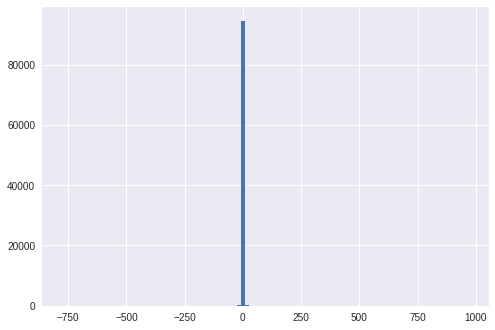

In [28]:
import matplotlib.pyplot as plt
#B = np.random.rand(1000)*100-50
_ = plt.hist(change_matrix, bins=100)
plt.show()